<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/main/Regression_Logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

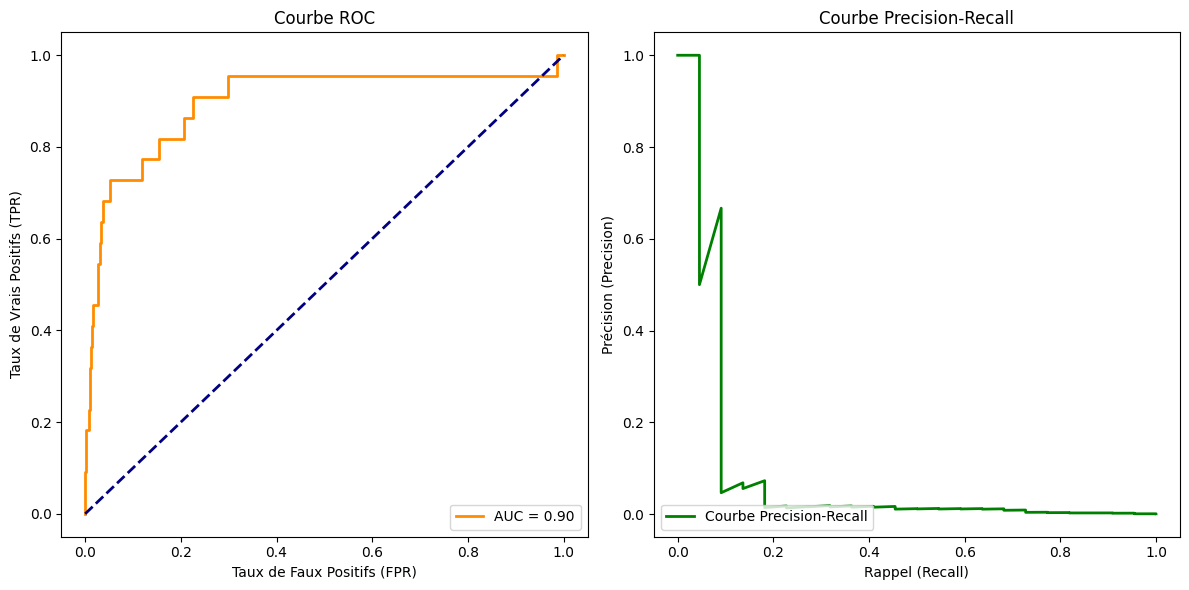

In [8]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Sélection des colonnes pertinentes dans notre fichier CSV
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']

# Cette ligne est utilisée pour sélectionner uniquement les colonnes spécifiées
# dans la liste selected_columns à partir du DataFrame data.
# Cela permet de filtrer le DataFrame initial et de conserver uniquement les colonnes
# jugées pertinentes pour l'analyse ou la modélisation.
data = data[selected_columns]

# La ligne de code data.dropna(inplace=True) est utilisée pour supprimer les lignes contenant
# des valeurs manquantes (NaN) du DataFrame data. Cette opération est réalisée de manière inplace,
# ce qui signifie que le DataFrame original est modifié directement, plutôt que de créer une copie modifiée.
data.dropna(inplace=True)

# Encodage des variables catégorielles avec LabelEncoder

# Cela crée une instance de la classe LabelEncoder de scikit-learn. LabelEncoder est utilisé pour transformer les étiquettes de texte en nombres.
label_encoder = LabelEncoder()
# Cela définit une liste de noms de colonnes dans le DataFrame data qui contiennent des variables catégorielles que nous voulons encoder.
categorical_columns = ['type', 'nameOrig', 'nameDest']
# C'est une boucle qui itère sur chaque nom de colonne dans categorical_columns.
for col in categorical_columns:
    # À chaque itération de la boucle, cette ligne de code applique la méthode fit_transform de LabelEncoder à la colonne spécifiée par col dans le DataFrame data. Cette méthode ajuste le transformateur aux données de cette colonne (ajuste le mapping des catégories aux entiers) et transforme les valeurs de la colonne en entiers. Les résultats sont stockés dans la même colonne du DataFrame data.
    data[col] = label_encoder.fit_transform(data[col])

# Séparation des caractéristiques (X) et de la variable cible (y)

# Cette ligne crée la variable X, qui représente les caractéristiques (features) de nos données. La fonction drop est utilisée pour exclure la colonne 'isFraud' de l'ensemble de données. L'argument axis=1 indique que nous voulons supprimer une colonne (par opposition à une ligne). Ainsi, X contient toutes les colonnes de l'ensemble de données sauf la colonne 'isFraud'.
X = data.drop('isFraud', axis=1)
# Cette ligne crée la variable y, qui représente la variable cible que nous cherchons à prédire. Ici, 'isFraud' est la colonne que nous voulons prédire. Ainsi, y contient les étiquettes associées à chaque exemple dans notre ensemble de données, indiquant si un exemple est une fraude ou non.
y = data['isFraud']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
# Cette ligne de code crée quatre ensembles de données (X_train, X_test, y_train, y_test) à partir des données originales (X, y), permettant ainsi de séparer les données en un ensemble pour entraîner le modèle et un autre pour évaluer sa performance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création d'un modèle de régression logistique avec un solveur différent et plus d'itérations
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Entraînement du modèle sur l'ensemble d'entraînement mis à l'échelle
# Cette ligne de code crée un modèle de régression logistique avec des paramètres spécifiques, notamment un nombre maximum d'itérations de 1000 et l'utilisation du solver 'liblinear'. Ces paramètres sont ajustés en fonction des caractéristiques du jeu de données et des exigences d'optimisation.
model.fit(X_train_scaled, y_train)

# Prédictions de probabilité sur l'ensemble de test
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calcul des taux de faux positifs (FPR) et des taux de vrais positifs (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calcul de l'AUC (Area Under the Curve) pour la courbe ROC
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')

# Calcul des précisions et des rappels pour la courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Affichage de la courbe Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='Courbe Precision-Recall')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Precision-Recall')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()
